I am using the below dataset from Kaggle
https://www.kaggle.com/datasets/alexattia/the-simpsons-characters-dataset

**Figure 1.Simpsons characters**

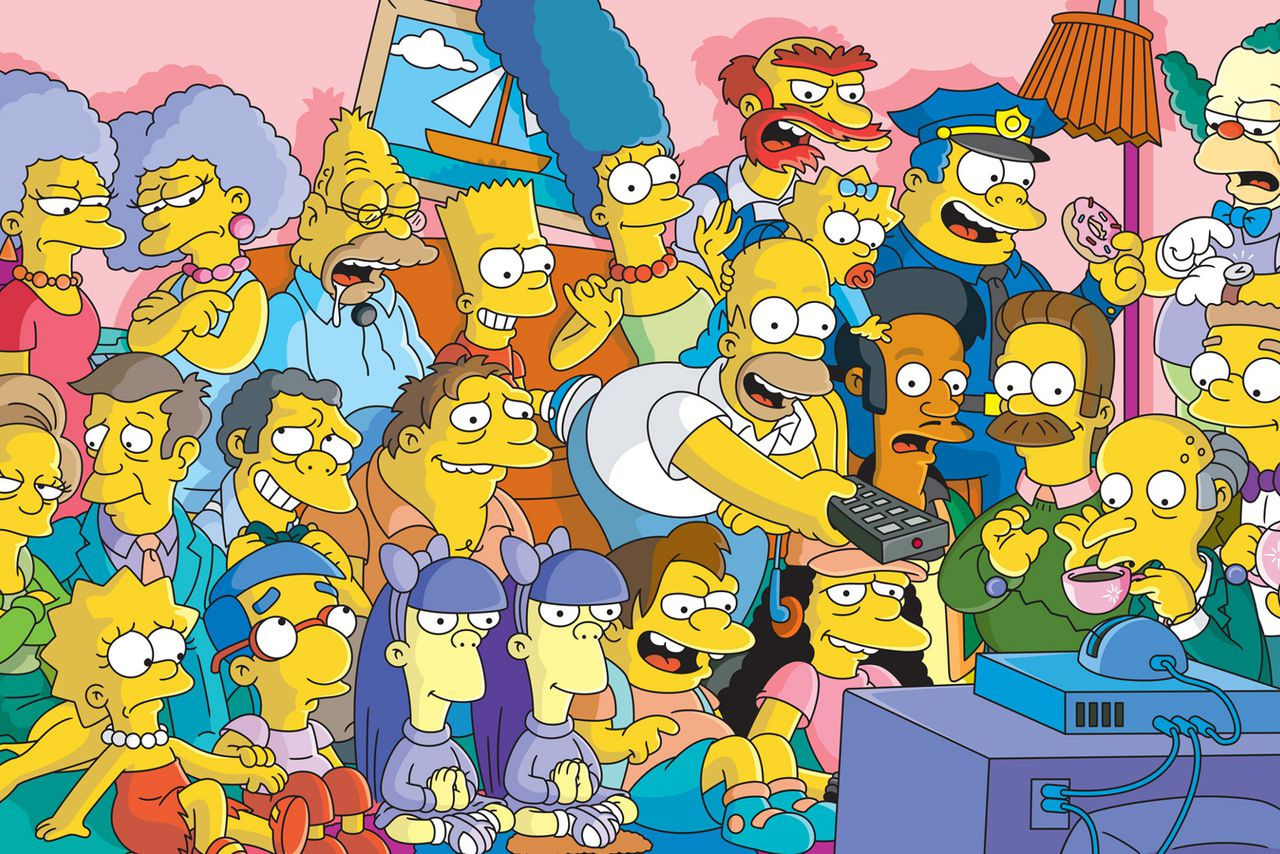


## Multi-class classification Neural Networks

We will build a **multi class classification model** for classifying simpsons characters from images.

Before that, lets dig deeper about the facts of this [dataset](https://www.kaggle.com/datasets/alexattia/the-simpsons-characters-dataset).


In [1]:
original_path='./Data/characters'

In [2]:
import os
import pathlib 

def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    total=0
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            count=len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])
            print("There are " + str(count) + " files in " + \
            str(path.name))
            total=total+count
    print('There are ' + str(total) +' files in '+ original_path)

We are counting number of images per character(folder).

In [3]:
count_files(original_path) # data_dir is the directory you want files counted.

There are 913 files in abraham_grampa_simpson
There are 42 files in agnes_skinner
There are 623 files in apu_nahasapeemapetilon
There are 106 files in barney_gumble
There are 1342 files in bart_simpson
There are 98 files in carl_carlson
There are 1193 files in charles_montgomery_burns
There are 986 files in chief_wiggum
There are 47 files in cletus_spuckler
There are 469 files in comic_book_guy
There are 8 files in disco_stu
There are 457 files in edna_krabappel
There are 27 files in fat_tony
There are 27 files in gil
There are 121 files in groundskeeper_willie
There are 2246 files in homer_simpson
There are 498 files in kent_brockman
There are 1206 files in krusty_the_clown
There are 310 files in lenny_leonard
There are 3 files in lionel_hutz
There are 1354 files in lisa_simpson
There are 128 files in maggie_simpson
There are 1291 files in marge_simpson
There are 71 files in martin_prince
There are 246 files in mayor_quimby
There are 1079 files in milhouse_van_houten
There are 17 file

This dataset also contains **'annotation.csv** which holds:

* **Path of the file**
* **BoundingBox**
* **Class name/labels**



In [4]:
import pandas as pd
annotation_df=pd.read_csv('./annotation.csv')

annotation.csv -- Annotation file for bounding boxes for each character
File_Path -- Path for the image file
xmin,ymin -- left top point of the box
xmax,ymax -- right bottom point of the box
character -- character name

In [5]:
annotation_df

,File_Path,xmin,ymin,xmax,ymax,character
0,./characters/abraham_grampa_simpson/pic_0000.jpg,57,72,152,172,abraham_grampa_simpson
1,./characters/abraham_grampa_simpson/pic_0001.jpg,80,31,337,354,abraham_grampa_simpson
2,./characters/abraham_grampa_simpson/pic_0002.jpg,128,48,285,407,abraham_grampa_simpson
3,./characters/abraham_grampa_simpson/pic_0003.jpg,72,126,158,275,abraham_grampa_simpson
4,./characters/abraham_grampa_simpson/pic_0004.jpg,123,61,294,416,abraham_grampa_simpson
...,...,...,...,...,...,...
6746,./characters/sideshow_bob/pic_0721.jpg,32,89,225,323,sideshow_bob
6747,./characters/sideshow_bob/pic_0779.jpg,110,2,503,392,sideshow_bob
6748,./characters/sideshow_bob/pic_0609.jpg,198,3,525,346,sideshow_bob
6749,./characters/sideshow_bob/pic_0427.jpg,103,75,240,253,sideshow_bob


Showing a test_image with bounding box.

In [6]:
import cv2
def load_image(path):
    return cv2.imread(path)


def draw_bounding_box(img,x1,y1,x2,y2):
    color=(255,0,0)
    return cv2.rectangle(img,(x1,y1),(x2,y2),color)

def crop_image(img,x1,y1,x2,y2):
    return img[y1:y2,x1:x2]

def save_image(img,path):
    try:
        cv2.imwrite(img,path)
    except:
        print('problem')

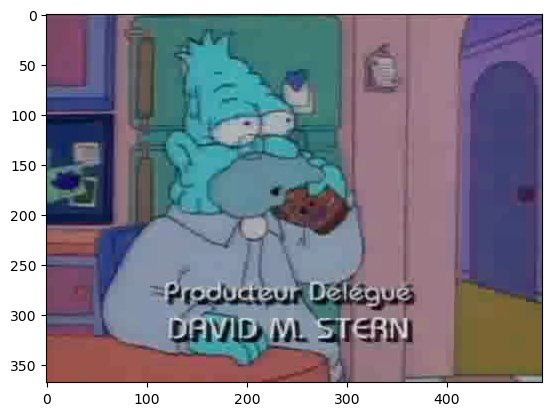

In [7]:
import matplotlib.pyplot as plt
test_image=load_image('./Data/characters/abraham_grampa_simpson/pic_0001.jpg')
plt.imshow(test_image)

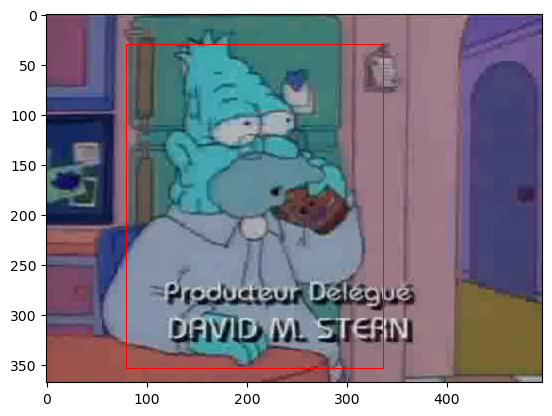

In [8]:
image_bb=draw_bounding_box(test_image,80,31,337,354)
plt.imshow(image_bb)
crop=crop_image(test_image,38,10,85,106)